train_x's shape: (12288, 209)
test_x's shape: (12288, 50)
Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


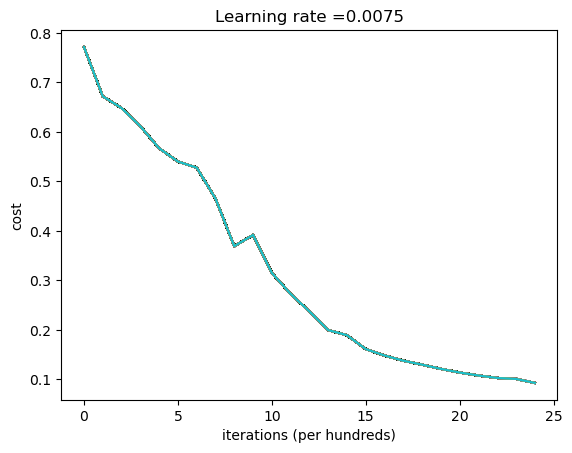

Accuracy: 100.0
y = 1.0, your L-layer model predicts a "cat" picture.


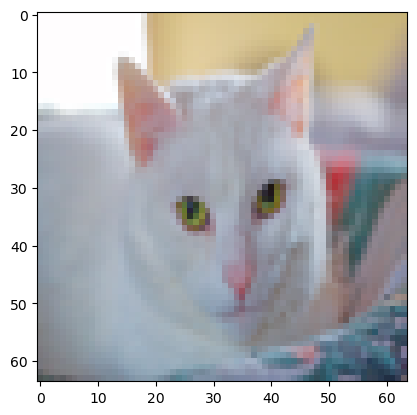

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from utils import *
np.random.seed(1)


In [2]:
# Load datasets
train_x_orig, train_y, test_x_orig, test_y, classes = load_datasets()

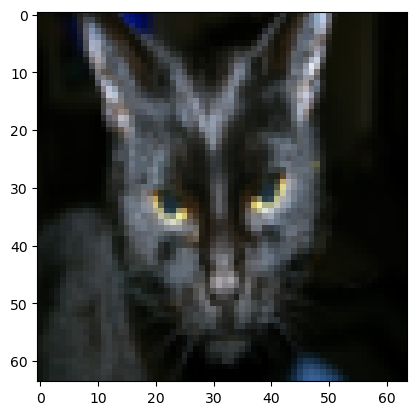

In [3]:
index = 25
plt.imshow(train_x_orig[index])

In [4]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]
print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [5]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [6]:
# N Layer model
def N_layer_model(X, Y, layer_dims, learning_rate=0.0075, num_iterations=10000, print_cost=False):
    np.random.seed(1)
    costs = []
    params = initialize_parameters(layer_dims)
    for i in range(0, num_iterations):
        AL, caches = linear_model(X, params)
        cost = compute_cost(AL, Y)
        grads = activation_backward_model(AL, Y, caches)
        params = update_params(params, grads, learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
        plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return params

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


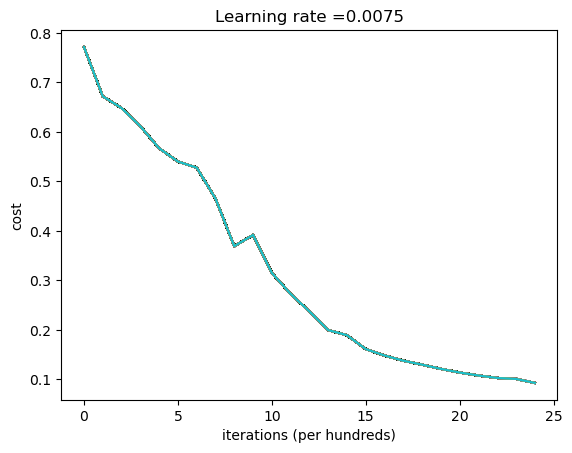

In [7]:
layer_dims = [12288, 20, 7, 5, 1]

params = N_layer_model(train_x, train_y, layer_dims,learning_rate=0.0075, num_iterations = 2500, print_cost = True)

In [8]:
pred_train = predict(train_x, train_y, params)

Accuracy: 98.5645933014354


In [9]:
pred_test = predict(test_x, test_y, params)

Accuracy: 80.0


Accuracy: 100.0
y = 1.0, your L-layer model predicts a "cat" picture.


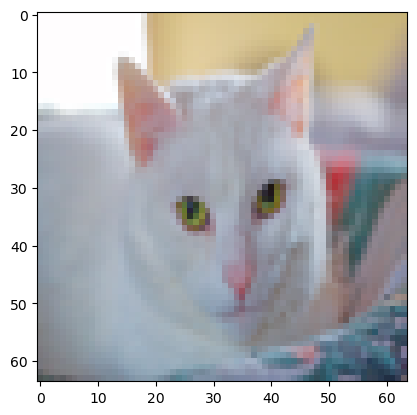

In [10]:
# Actual image test
fileName = 'cat.png'
myImage = Image.open(fileName).convert('RGB').resize([num_px, num_px])
image = np.array(myImage)
test_image = image.reshape(num_px*num_px*3, 1)
test_image = test_image/255
prediction = predict(test_image, [1], params)

print ("y = " + str(np.squeeze(prediction)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(prediction)),].decode("utf-8") +  "\" picture.")
plt.imshow(image)
